In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.00000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(random.uniform(-5., 5.))
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.8001119925218987-0.001626730706170481j)], [(0.5996924447594928-0.013679358538352027j)]]
iteracao:  2
[[(0.8006351568194587+0.006736681856450315j)], [(0.5989515129182558-0.013965956078819725j)]]
iteracao:  3
[[(0.8002808422093575-0.011727453561913116j)], [(0.5974184854627328-0.050041917329785184j)]]
iteracao:  4
[[(0.8002669042122177-0.02191139522738152j)], [(0.5945407932436535-0.07492674921593402j)]]
iteracao:  5
[[(0.7951037311422546-0.05969458713389471j)], [(0.5878056427349035-0.13686174255733902j)]]
iteracao:  6
[[(0.7954818711172287-0.06673185745491063j)], [(0.5814702928495913-0.15699601155668552j)]]
iteracao:  7
[[(0.7994225143672313-0.06116772946574296j)], [(0.5760134539665624-0.15934443954039287j)]]
iteracao:  8
[[(0.7926489613727008-0.0908987855762358j)], [(0.5650062828148033-0.21026871245129433j)]]
iteracao:  9
[[(0.7943542083033485-0.09520980681772745j)], [(0.5560984357547243-0.2251466419987474j)]]
iteracao:  10
[[(0.7950540237233024-0.10239776533272152j)], 

[[(0.2136901020053739-0.7059612549876557j)], [(-0.5197586224643103+0.43105239249551286j)]]
iteracao:  83
[[(0.19025063522558763-0.7228255992766535j)], [(-0.4791715026560919+0.46013309279168085j)]]
iteracao:  84
[[(0.16998931862898484-0.7342574493310998j)], [(-0.4433039391967925+0.4852331295678649j)]]
iteracao:  85
[[(0.15873245535604005-0.736581821026747j)], [(-0.42039470647523+0.5054893294002684j)]]
iteracao:  86
[[(0.14473980432478803-0.7408493474881592j)], [(-0.39267805179787174+0.5253537129728648j)]]
iteracao:  87
[[(0.14613852503008945-0.7336525048861873j)], [(-0.38553105533473647+0.5401511655246495j)]]
iteracao:  88
[[(0.15506174503112477-0.7216301626216625j)], [(-0.38687925817280394+0.5527478139016376j)]]
iteracao:  89
[[(0.1420106078080372-0.7250831696782829j)], [(-0.35822830731875865+0.5707537180116308j)]]
iteracao:  90
[[(0.15242263306001613-0.7138995783744502j)], [(-0.35816418870502204+0.5820937117175554j)]]
iteracao:  91
[[(0.12255007605534632-0.7264931769420727j)], [(-0.30

[[(-0.6220764416607756-0.40071190205685847j)], [(0.19843685095130772-0.6427080077440287j)]]
iteracao:  161
[[(-0.6183772404734338-0.38814337583290087j)], [(0.17370253758205242-0.6608945690003152j)]]
iteracao:  162
[[(-0.6381031601756957-0.381478802851758j)], [(0.13468635556310363-0.6551013356032716j)]]
iteracao:  163
[[(-0.6444135537886192-0.3714775260335838j)], [(0.10345957396194277-0.6603269115880367j)]]
iteracao:  164
[[(-0.6146354219575088-0.35650822088923734j)], [(0.09046614668182751-0.6978115471420112j)]]
iteracao:  165
[[(-0.5877754466004089-0.3433551841850446j)], [(0.07270400437756408-0.7289315887119767j)]]
iteracao:  166
[[(-0.5683185080619327-0.33223237803479855j)], [(0.049120753601877565-0.7511476305548732j)]]
iteracao:  167
[[(-0.5516148542935351-0.32240099901068775j)], [(0.02270078406446919-0.7689364169933594j)]]
iteracao:  168
[[(-0.5765594508900355-0.31355299154958954j)], [(-0.021527485572539883-0.7541884237197143j)]]
iteracao:  169
[[(-0.5959563350801685-0.3035220584562

[[(-0.5019469149945984+0.55211018493212j)], [(0.5575972166134558+0.36374277514935877j)]]
iteracao:  257
[[(-0.4936660469782239+0.560671412702818j)], [(0.5733682664616252+0.33643729907859987j)]]
iteracao:  258
[[(-0.46857256294081634+0.5389684545853625j)], [(0.6161856888439634+0.3320659233578581j)]]
iteracao:  259
[[(-0.4638191341673491+0.5538435351085137j)], [(0.6243623221823245+0.29715427351324963j)]]
iteracao:  260
[[(-0.44205234422596906+0.5318248028611761j)], [(0.6627212865135933+0.287319371712538j)]]
iteracao:  261
[[(-0.44186451020256823+0.5596921330715678j)], [(0.6579099508656742+0.24218750484963758j)]]
iteracao:  262
[[(-0.44091728091053467+0.5907818073056577j)], [(0.6469226151894295+0.19508909877807348j)]]
iteracao:  263
[[(-0.4319378378640404+0.5989615052962469j)], [(0.654163319897415+0.1635389530836863j)]]
iteracao:  264
[[(-0.4190222445094456+0.5901019252378146j)], [(0.6752715256281692+0.14215576595185297j)]]
iteracao:  265
[[(-0.4098907574026926+0.5976759096725974j)], [(0.

[[(0.40383689982298504+0.6250873215626462j)], [(-0.6671303916727787+0.03344278692097471j)]]
iteracao:  335
[[(0.4157693404724814+0.6506214881188992j)], [(-0.6339507474472063+0.043974585147296186j)]]
iteracao:  336
[[(0.4225333715615015+0.6141839190044056j)], [(-0.6598801574036457+0.09381694134757367j)]]
iteracao:  337
[[(0.4296685702319359+0.593773092581046j)], [(-0.6670002722824188+0.13389864750703737j)]]
iteracao:  338
[[(0.43652883916398694+0.5767760204946891j)], [(-0.6687240108634109+0.17198828043132586j)]]
iteracao:  339
[[(0.45178848885897205+0.5919038124616496j)], [(-0.6405074289273787+0.18784847007312777j)]]
iteracao:  340
[[(0.4658571277794756+0.599704316351965j)], [(-0.6169891937028137+0.20653324232226766j)]]
iteracao:  341
[[(0.4682360361488927+0.5737627213959783j)], [(-0.6238262671490125+0.24978374173267343j)]]
iteracao:  342
[[(0.47918505798067956+0.5709129203792375j)], [(-0.6071832430425007+0.27526060756670967j)]]
iteracao:  343
[[(0.4838678070287878+0.5547680595700877j)]

[[(0.6855512544558034-0.2087483871320818j)], [(0.36535999621771265-0.5941004875771391j)]]
iteracao:  425
[[(0.7046329710754385-0.206198966718194j)], [(0.34544306046688733-0.584502507835677j)]]
iteracao:  426
[[(0.7083903745244492-0.21330638577915617j)], [(0.3202384028250795-0.5917183078579168j)]]
iteracao:  427
[[(0.6791326026372617-0.2368363284549617j)], [(0.2818814367847446-0.6350039703645736j)]]
iteracao:  428
[[(0.6921583747185829-0.24044233897149406j)], [(0.2584081325137459-0.6295468434136123j)]]
iteracao:  429
[[(0.7189793336257414-0.23917226054354793j)], [(0.24113894334735106-0.6063968023181409j)]]
iteracao:  430
[[(0.7051077499192868-0.25399501377684575j)], [(0.20804256325531878-0.6285122193536896j)]]
iteracao:  431
[[(0.7138297428648548-0.26114459778418275j)], [(0.18379482859888-0.6232734409118318j)]]
iteracao:  432
[[(0.6914489389184404-0.27688501677246097j)], [(0.14609408270116492-0.6510678110522302j)]]
iteracao:  433
[[(0.691722503131467-0.28679847387081014j)], [(0.11741154

[[(0.029896913023464314-0.8561717023921368j)], [(0.05013911760921734+0.5133828434593053j)]]
iteracao:  503
[[(0.02390609065868559-0.8574107496016038j)], [(0.061763631944900796+0.5103530577111682j)]]
iteracao:  504
[[(0.027928780751041753-0.8598491278510498j)], [(0.05615952420045092+0.5066806221102089j)]]
iteracao:  505
[[(0.002549013782355329-0.8582493498291515j)], [(0.10017729120910163+0.5033544977012653j)]]
iteracao:  506
[[(-0.03421982268863-0.8518450672427818j)], [(0.16364616866585807+0.4963956057767588j)]]
iteracao:  507
[[(-0.06821105292317524-0.8429084279314224j)], [(0.2224758729872156+0.4851358560892128j)]]
iteracao:  508
[[(-0.07534343967855407-0.8446933590349784j)], [(0.23435083119762792+0.47528503210473844j)]]
iteracao:  509
[[(-0.08432652503804014-0.8456461961757727j)], [(0.24877997633727328+0.4646286150761908j)]]
iteracao:  510
[[(-0.11085459864953026-0.8361906700549838j)], [(0.2948233375028194+0.44897137846502594j)]]
iteracao:  511
[[(-0.11478282120226581-0.84060340256972

[[(-0.5086708598767617-0.18346082115568535j)], [(-0.7034741625800915-0.46121558542014585j)]]
iteracao:  583
[[(-0.5215515808389687-0.15872401960380206j)], [(-0.7281154159280101-0.41549753892009084j)]]
iteracao:  584
[[(-0.5290505211778076-0.14084431555768048j)], [(-0.7486708751578669-0.3738448540361221j)]]
iteracao:  585
[[(-0.5436949745136777-0.10452409862178769j)], [(-0.7694952666965579-0.31835067079026885j)]]
iteracao:  586
[[(-0.5364507489892273-0.11868422030183451j)], [(-0.7807523929022718-0.2975902856404361j)]]
iteracao:  587
[[(-0.5297764263292202-0.13400194280533625j)], [(-0.7904764768112232-0.27663511021379233j)]]
iteracao:  588
[[(-0.5212817123471513-0.15763738103470581j)], [(-0.7972757998869059-0.2603204913139699j)]]
iteracao:  589
[[(-0.5244525441178454-0.1468210046500355j)], [(-0.8091066807160167-0.2207693988472051j)]]
iteracao:  590
[[(-0.5191946303652489-0.16832669283138343j)], [(-0.8132932292640078-0.20163533893397106j)]]
iteracao:  591
[[(-0.5166582122573117-0.18295739

[[(-0.28231101499451317+0.2559017395267051j)], [(0.9225708077671371+0.06064209589261007j)]]
iteracao:  662
[[(-0.2771222989989406+0.23104016760356505j)], [(0.9322877262943949+0.02574559839039832j)]]
iteracao:  663
[[(-0.27338855048369587+0.1984300973371928j)], [(0.9411835829950402-0.007564867108096611j)]]
iteracao:  664
[[(-0.26962888727917084+0.21728650078552605j)], [(0.936454167496541-0.05603569189545205j)]]
iteracao:  665
[[(-0.2679386783679905+0.20158717526033787j)], [(0.9373601181171938-0.09448307239011268j)]]
iteracao:  666
[[(-0.2614788051684134+0.2296328315666773j)], [(0.9261838934053137-0.1451914550239175j)]]
iteracao:  667
[[(-0.26160304589526273+0.2134296146840689j)], [(0.9233140499231067-0.18303654497384453j)]]
iteracao:  668
[[(-0.25691332320977517+0.22313435952657001j)], [(0.9122905394727585-0.2278862413631452j)]]
iteracao:  669
[[(-0.24913692691241657+0.241950413052389j)], [(0.896630812511567-0.27466987538881726j)]]
iteracao:  670
[[(-0.2538152913504221+0.220494338187302

[[(0.06589373749677571+0.23059778048362553j)], [(-0.8942171983905421+0.37796533120593123j)]]
iteracao:  739
[[(0.06804827521894707+0.22636272276096617j)], [(-0.8762352812973502+0.4199292704038773j)]]
iteracao:  740
[[(0.07906884486374051+0.23966862835812622j)], [(-0.8516106269048522+0.45941910772872674j)]]
iteracao:  741
[[(0.11064700448306039+0.28615690135652055j)], [(-0.8139984969773265+0.493231608849056j)]]
iteracao:  742
[[(0.1338868699085307+0.3131880868351828j)], [(-0.7790721594047125+0.5263398164270684j)]]
iteracao:  743
[[(0.14058775260408768+0.31353497859328494j)], [(-0.7524002071612058+0.5619825021514752j)]]
iteracao:  744
[[(0.14340984772966517+0.3086709375522491j)], [(-0.7261875443783828+0.5973332583925055j)]]
iteracao:  745
[[(0.12969343163843608+0.2851647165259565j)], [(-0.7059939568471827+0.6351635488576868j)]]
iteracao:  746
[[(0.13755766036325334+0.28663999960148295j)], [(-0.6738256564393883+0.6669886715214479j)]]
iteracao:  747
[[(0.13711689674869965+0.279766803325255

[[(0.6593794195846163-0.15457475341575772j)], [(0.41671758889824534-0.6063590550790586j)]]
iteracao:  817
[[(0.6724887214232619-0.1546926177884406j)], [(0.39204309897640793-0.6083837176397587j)]]
iteracao:  818
[[(0.7008538144799112-0.1459328599472288j)], [(0.37145964343983706-0.5912061310005989j)]]
iteracao:  819
[[(0.7172880922165815-0.145622259895868j)], [(0.3483601790291962-0.5856078556047185j)]]
iteracao:  820
[[(0.7004658020824414-0.16470188405070083j)], [(0.3162793705952215-0.6182133397446415j)]]
iteracao:  821
[[(0.6849291685914362-0.18165779568417575j)], [(0.2829651469519425-0.6463765378886079j)]]
iteracao:  822
[[(0.6600371375785229-0.20093724186383827j)], [(0.24536886416288992-0.6810056865601634j)]]
iteracao:  823
[[(0.6323851454643492-0.21895691077187387j)], [(0.2051525504483868-0.7141839760180817j)]]
iteracao:  824
[[(0.6209766682219314-0.2308402710818148j)], [(0.16866854476052676-0.7298294938895639j)]]
iteracao:  825
[[(0.6211507528960301-0.23979201845557882j)], [(0.13542

[[(-0.1753555016085521-0.8105094054816319j)], [(0.4213229223707123+0.36716660579112426j)]]
iteracao:  912
[[(-0.19429904821015737-0.7998663204640439j)], [(0.4523327708220896+0.3433018833046464j)]]
iteracao:  913
[[(-0.19643622888139756-0.81081737057697j)], [(0.44293784500248257+0.32831910436504247j)]]
iteracao:  914
[[(-0.2233910026320256-0.7859101778212121j)], [(0.4944734108564572+0.2965418431572171j)]]
iteracao:  915
[[(-0.24388744547417018-0.7671101432083192j)], [(0.5306399990093995+0.26548351978564466j)]]
iteracao:  916
[[(-0.24604438643026325-0.7835428179567682j)], [(0.512654540683124+0.2504146554373237j)]]
iteracao:  917
[[(-0.2531716486881492-0.7906990313286617j)], [(0.506915256016421+0.23180907382302052j)]]
iteracao:  918
[[(-0.2710075768996861-0.7731767148062882j)], [(0.5371809906229891+0.20047096819398436j)]]
iteracao:  919
[[(-0.27379983817335235-0.7944647910136887j)], [(0.508014046295943+0.18915717626074274j)]]
iteracao:  920
[[(-0.28456561286953164-0.7949728135572688j)], [

[[(-0.5842720698751817-0.11116525819655844j)], [(-0.7874283894082804-0.16193913470470667j)]]
iteracao:  990
[[(-0.5861398730339978-0.10085132144343081j)], [(-0.7943133039496922-0.12383357108177023j)]]
iteracao:  991
[[(-0.5859789900133989-0.1045051547864306j)], [(-0.7978302132075848-0.09577872752285822j)]]
iteracao:  992
[[(-0.5872011860169142-0.09914018404174159j)], [(-0.801032830869031-0.060923827046622095j)]]
iteracao:  993
[[(-0.5879268952120247-0.10468784333650981j)], [(-0.8013900516452311-0.03399594323029663j)]]
iteracao:  994
[[(-0.58937071727429-0.06287226131221549j)], [(-0.8049342946254088+0.027736852166365844j)]]
iteracao:  995
[[(-0.5910648800002566-0.06658593405963727j)], [(-0.8019130254935062+0.05606635108530403j)]]
iteracao:  996
[[(-0.5951189504949784-0.09361540122900741j)], [(-0.7953719348044582+0.0667262432714257j)]]
iteracao:  997
[[(-0.5992895076590984-0.11119036187850506j)], [(-0.7883390456535689+0.08372367130188549j)]]
iteracao:  998
[[(-0.5962038148190902-0.070639

In [6]:
len(Resp[0])

1000

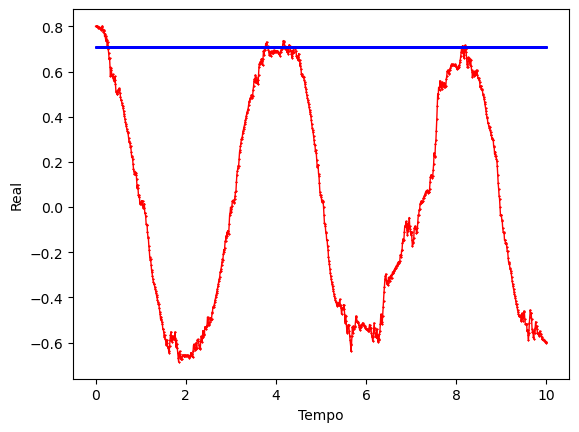

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

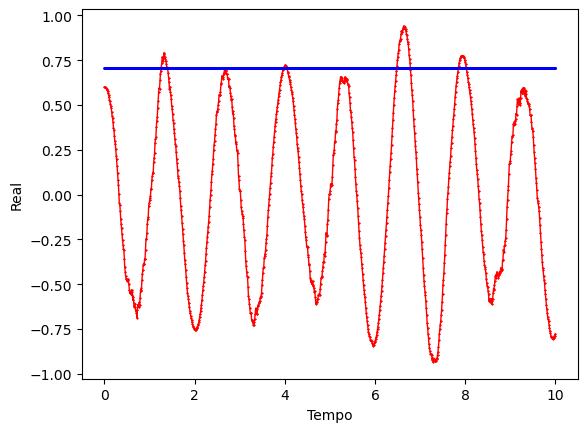

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()